In [132]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [133]:
%store -r student_courses
%store -r student_majors
%store -r stem_paths
%store -r jacobs
%store -r jacobs_ethnicities
%store -r bcdi
%store -r waivers
%store -r beeps

In [134]:
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
from matplotlib.ticker import FuncFormatter
color_list = ['#820263', '#B93C89', '#C44995', '#FC729B']
jacobs_colors = [mcolors.to_rgb(x) for x in color_list]
blue_gold = [(0.992,0.709,0.082),(0.231,0.494,0.631)]
jacobs_two = [mcolors.to_rgb('#F4A3A8'), mcolors.to_rgb('#8B3058')]

In [135]:
jacobs_ethnicities.drop_duplicates(subset='ppsk', inplace=True)

## Finding proportion of women/URMs through all top majors at Jacobs and compare it to Jacobs

In [136]:
top_majors = ['L&S Computer Science', 'Mechanical Engineering', 'Electrical Eng & Comp Sci', 'Cognitive Science', 'Letters & Sci Undeclared', 'Architecture']
majors = student_majors.groupby('ppsk').last().reset_index()

def add_major(df):
    temp = df[:]
    na_majors = df[df['major'].isna()].merge(stem_paths[['major.intended.department','ppsk']], on ='ppsk')
    new_temp = temp.merge(na_majors[['ppsk','major.intended.department']], on='ppsk', how='left').drop_duplicates()
    new_temp['major'].fillna(value = new_temp['major.intended.department'],inplace=True)
    return new_temp.drop('major.intended.department', axis=1)

In [137]:
prop_berkeley = student_courses[['ppsk']].drop_duplicates().merge(stem_paths[['ppsk', 'ethnic.l1','ethnic.l2','ethnic.l3','gender']], on='ppsk', how='inner').merge(majors[['ppsk','major',]], how='left').drop_duplicates()
prop_berkeley = add_major(prop_berkeley)
all_berk = prop_berkeley[:]
prop_berkeley = prop_berkeley[prop_berkeley['major'].isin(top_majors)]
prop_berkeley

,ppsk,ethnic.l1,ethnic.l2,ethnic.l3,gender,major
3,731964,White/Other,White,White,Male,Mechanical Engineering
52,826065,White/Other,White,White,Male,L&S Computer Science
55,832181,International,International,International,Male,L&S Computer Science
72,680369,White/Other,White,White,Male,Architecture
78,695918,White/Other,White,White,Male,L&S Computer Science
...,...,...,...,...,...,...
80291,2727864,Asian/Pacific Islander,Asian,Chinese,Male,Electrical Eng & Comp Sci
80300,2632309,White/Other,White,White,Male,Letters & Sci Undeclared
80301,1315825,Asian/Pacific Islander,Asian,Chinese,Male,Letters & Sci Undeclared
80305,2632260,White/Other,White,White,Female,Letters & Sci Undeclared


In [138]:
berk_women_prop = prop_berkeley.groupby(['major', 'gender']).count().unstack()['ppsk']
berk_women_prop['Total'] = berk_women_prop.sum(axis=1)
berk_women_prop['Women Proportion'] = (berk_women_prop['Female']/berk_women_prop['Total'])*100
berk_women_prop['Other Proportion'] = 100 - berk_women_prop['Women Proportion']
berk_women_prop.sort_values(by='Women Proportion',ascending=False,inplace=True)
berk_women_prop

gender,Decline to State,Female,Male,Total,Women Proportion,Other Proportion
major,,,,,,
Cognitive Science,8,484,334,826,58.595642,41.404358
Architecture,3,730,625,1358,53.755523,46.244477
Letters & Sci Undeclared,4,227,311,542,41.881919,58.118081
L&S Computer Science,25,613,1900,2538,24.152876,75.847124
Electrical Eng & Comp Sci,15,166,765,946,17.547569,82.452431
Mechanical Engineering,4,264,1374,1642,16.077954,83.922046


In [139]:
prop_jacobs = jacobs_ethnicities.drop_duplicates(subset='ppsk').merge(majors[['ppsk','major',]], how='left')
prop_jacobs = add_major(prop_jacobs)
prop_jacobs = prop_jacobs[prop_jacobs['major'].isin(top_majors)]
prop_jacobs

,ppsk,DES INV Students,All Courses Students,Maker Pass Holders,ethnic.l1,ethnic.l2,ethnic.l3,gender,year.name,major
1,1482482,N,Y,Y,International,International,International,Male,2015 Fall,L&S Computer Science
3,1473315,N,Y,Y,Asian/Pacific Islander,Asian,Chinese,Female,2015 Fall,L&S Computer Science
8,1473351,N,Y,N,International,International,International,Male,2015 Fall,L&S Computer Science
12,1482526,N,N,Y,White/Other,Other/Decline to State,Decline to State,Male,2015 Fall,Mechanical Engineering
14,1474646,N,N,Y,Asian/Pacific Islander,Asian,Chinese,Male,2015 Fall,L&S Computer Science
...,...,...,...,...,...,...,...,...,...,...
5438,2741368,N,Y,N,Asian/Pacific Islander,Asian,Chinese,Female,2020 Spring,L&S Computer Science
5440,2740646,N,Y,N,Asian/Pacific Islander,Asian,Chinese,Male,2020 Spring,Cognitive Science
5442,2639777,N,Y,N,Asian/Pacific Islander,Asian,Chinese,Female,2020 Spring,Cognitive Science
5443,2635196,N,Y,N,Asian/Pacific Islander,Asian,Korean,Male,2020 Spring,Letters & Sci Undeclared


In [ ]:
cleaned_jacobs.merge(stem_paths[['ppsk','gender']])

In [140]:
jacobs_women_prop = prop_jacobs.groupby(['major', 'gender']).count().unstack()['ppsk']
jacobs_women_prop['Total'] = jacobs_women_prop.sum(axis=1)
jacobs_women_prop['Women Proportion'] = (jacobs_women_prop['Female']/jacobs_women_prop['Total'])*100
jacobs_women_prop['Other Proportion'] = 100 - jacobs_women_prop['Women Proportion']
jacobs_women_prop.sort_values(by='Women Proportion',ascending=False,inplace=True)
jacobs_women_prop

gender,Decline to State,Female,Male,Total,Women Proportion,Other Proportion
major,,,,,,
Cognitive Science,2.0,169.0,94.0,265.0,63.773585,36.226415
Architecture,3.0,97.0,79.0,179.0,54.189944,45.810056
L&S Computer Science,10.0,211.0,454.0,675.0,31.259259,68.740741
Letters & Sci Undeclared,NaN,12.0,28.0,40.0,30.000000,70.000000
Electrical Eng & Comp Sci,2.0,71.0,230.0,303.0,23.432343,76.567657
Mechanical Engineering,4.0,134.0,495.0,633.0,21.169036,78.830964


In [141]:
jacobs_women_prop['Total'].sum()

2095.0

In [142]:
avg_women_jacobs = prop_jacobs.groupby('gender').count()[['ppsk']].transpose()
avg_women_jacobs['Women Proportion'] = (avg_women_jacobs['Female']/avg_women_jacobs.sum(axis=1))*100
avg_women_jacobs

gender,Decline to State,Female,Male,Women Proportion
ppsk,21,694,1380,33.126492


In [143]:
avg_women_berkeley = prop_berkeley.groupby('gender').count()[['ppsk']].transpose()
avg_women_berkeley['Women Proportion'] = (avg_women_berkeley['Female']/avg_women_berkeley.sum(axis=1))*100
avg_women_berkeley

gender,Decline to State,Female,Male,Women Proportion
ppsk,59,2484,5309,31.635252


In [144]:
both_women_prop = jacobs_women_prop[['Women Proportion']].merge(berk_women_prop[['Women Proportion']], left_index=True,right_index=True)
both_women_prop.rename(columns={'Women Proportion_x': 'Jacobs', 'Women Proportion_y':'Berkeley'},inplace=True)
both_women_prop

gender,Jacobs,Berkeley
major,,
Cognitive Science,63.773585,58.595642
Architecture,54.189944,53.755523
L&S Computer Science,31.259259,24.152876
Letters & Sci Undeclared,30.000000,41.881919
Electrical Eng & Comp Sci,23.432343,17.547569
Mechanical Engineering,21.169036,16.077954


In [145]:
jacobs_font = {'family': 'sans-serif',
        'color':  mcolors.to_rgb('#CC607D'),
        'weight': 'bold',
        'size': 12
        }
berkeley_font = {'family': 'sans-serif',
        'color':  jacobs_two[1],
        'weight': 'bold',
        'size': 12
        }

legend_font = {'family': 'sans-serif',
        'weight': 'normal',
        'size': 'large'
        }
title_font = {
    'family': 'sans-serif',
    'color':  'black',
    'weight': 'normal',
    'size': 14
}
JAC = mpatches.Patch(color=jacobs_two[0], label='Jacobs')
BERK = mpatches.Patch(color=jacobs_two[1], label='Berkeley')

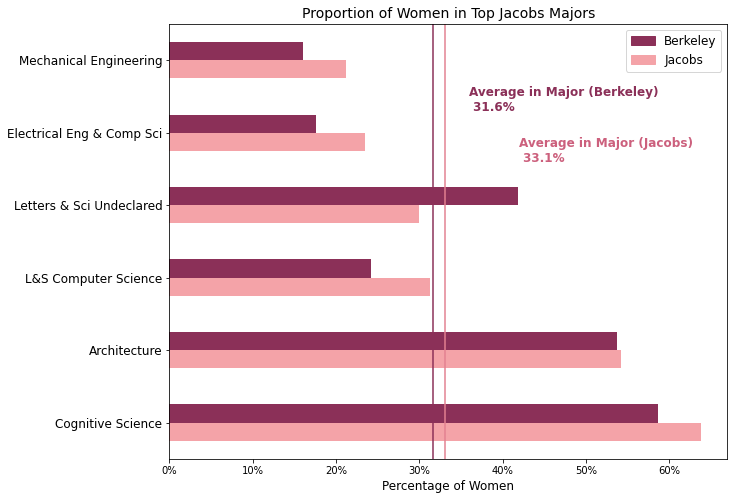

In [146]:
fig = both_women_prop.plot(kind='barh', figsize=(10,8), xlabel="", color=jacobs_two)
fig.axvline(x = avg_women_berkeley['Women Proportion'][0],color=jacobs_two[1])
fig.axvline(x = avg_women_jacobs['Women Proportion'][0],color=mcolors.to_rgb('#E38191'))

fig.set_title('Proportion of Women in Top Jacobs Majors',fontdict=title_font)
fig.text(36,4.3,"Average in Major (Berkeley) \n 31.6%",fontdict=berkeley_font)
fig.text(42,3.6,"Average in Major (Jacobs) \n 33.1%",fontdict=jacobs_font)

fig.set_xlabel("Percentage of Women", fontsize=12)
fig.legend(handles=[BERK, JAC], loc=1, prop=legend_font)
fig.set_xticklabels([str(int(x))+'%' for x in fig.get_xticks()])
fig.set_yticklabels(fig.get_yticklabels(), fontsize=12);

In [147]:
prop_berkeley

,ppsk,ethnic.l1,ethnic.l2,ethnic.l3,gender,major
3,731964,White/Other,White,White,Male,Mechanical Engineering
52,826065,White/Other,White,White,Male,L&S Computer Science
55,832181,International,International,International,Male,L&S Computer Science
72,680369,White/Other,White,White,Male,Architecture
78,695918,White/Other,White,White,Male,L&S Computer Science
...,...,...,...,...,...,...
80291,2727864,Asian/Pacific Islander,Asian,Chinese,Male,Electrical Eng & Comp Sci
80300,2632309,White/Other,White,White,Male,Letters & Sci Undeclared
80301,1315825,Asian/Pacific Islander,Asian,Chinese,Male,Letters & Sci Undeclared
80305,2632260,White/Other,White,White,Female,Letters & Sci Undeclared


In [148]:
berk_urms_prop = prop_berkeley.groupby(['major', 'ethnic.l1']).count().unstack()['ppsk']
berk_urms_prop['Total'] = berk_urms_prop.sum(axis=1)
berk_urms_prop['URM Proportion'] = (berk_urms_prop['Underrepresented Minority']/berk_urms_prop['Total'])*100
berk_urms_prop['Other Proportion'] = 100 - berk_urms_prop['URM Proportion']
berk_urms_prop.sort_values(by='URM Proportion',ascending=False,inplace=True)
berk_urms_prop

ethnic.l1,Asian/Pacific Islander,International,Underrepresented Minority,White/Other,Total,URM Proportion,Other Proportion
major,,,,,,,
Letters & Sci Undeclared,172,90,151,129,542,27.859779,72.140221
Architecture,485,249,253,371,1358,18.630339,81.369661
Cognitive Science,405,71,112,238,826,13.559322,86.440678
Mechanical Engineering,652,222,177,591,1642,10.779537,89.220463
Electrical Eng & Comp Sci,564,100,57,225,946,6.025370,93.974630
L&S Computer Science,1367,398,136,637,2538,5.358550,94.641450


In [149]:
prop_jacobs

,ppsk,DES INV Students,All Courses Students,Maker Pass Holders,ethnic.l1,ethnic.l2,ethnic.l3,gender,year.name,major
1,1482482,N,Y,Y,International,International,International,Male,2015 Fall,L&S Computer Science
3,1473315,N,Y,Y,Asian/Pacific Islander,Asian,Chinese,Female,2015 Fall,L&S Computer Science
8,1473351,N,Y,N,International,International,International,Male,2015 Fall,L&S Computer Science
12,1482526,N,N,Y,White/Other,Other/Decline to State,Decline to State,Male,2015 Fall,Mechanical Engineering
14,1474646,N,N,Y,Asian/Pacific Islander,Asian,Chinese,Male,2015 Fall,L&S Computer Science
...,...,...,...,...,...,...,...,...,...,...
5438,2741368,N,Y,N,Asian/Pacific Islander,Asian,Chinese,Female,2020 Spring,L&S Computer Science
5440,2740646,N,Y,N,Asian/Pacific Islander,Asian,Chinese,Male,2020 Spring,Cognitive Science
5442,2639777,N,Y,N,Asian/Pacific Islander,Asian,Chinese,Female,2020 Spring,Cognitive Science
5443,2635196,N,Y,N,Asian/Pacific Islander,Asian,Korean,Male,2020 Spring,Letters & Sci Undeclared


In [150]:
jacobs_urms_prop = prop_jacobs.groupby(['major', 'ethnic.l1']).count().unstack()['ppsk']
jacobs_urms_prop['Total'] = jacobs_urms_prop.sum(axis=1)
jacobs_urms_prop['URM Proportion'] = (jacobs_urms_prop['Underrepresented Minority']/jacobs_urms_prop['Total'])*100
jacobs_urms_prop['Other Proportion'] = 100 - jacobs_urms_prop['URM Proportion']
jacobs_urms_prop.sort_values(by='URM Proportion',ascending=False,inplace=True)
jacobs_urms_prop

ethnic.l1,Asian/Pacific Islander,International,Underrepresented Minority,White/Other,Total,URM Proportion,Other Proportion
major,,,,,,,
Architecture,62,35,38,44,179,21.229050,78.770950
Letters & Sci Undeclared,22,5,6,7,40,15.000000,85.000000
Mechanical Engineering,258,84,79,212,633,12.480253,87.519747
Cognitive Science,156,22,28,59,265,10.566038,89.433962
Electrical Eng & Comp Sci,178,27,23,75,303,7.590759,92.409241
L&S Computer Science,384,101,26,164,675,3.851852,96.148148


In [151]:
jacobs

,ppsk,year,term,DES INV Students,All Courses Students,Maker Pass Holders
0,724096,2015,Fall,Y,Y,Y
1,687168,2015,Fall,N,Y,Y
2,MISSING,2015,Fall,N,Y,N
3,781707,2015,Fall,N,N,Y
4,MISSING,2015,Fall,N,N,Y
...,...,...,...,...,...,...
16371,MISSING,2020,Fall,N,Y,N
16372,MISSING,2020,Fall,N,Y,N
16373,MISSING,2020,Fall,N,Y,N
16374,MISSING,2020,Fall,N,Y,N


In [152]:
avg_urm_berkeley = prop_berkeley.groupby('ethnic.l1').count()[['ppsk']].transpose()
avg_urm_berkeley['URM Proportion'] = (avg_urm_berkeley['Underrepresented Minority']/avg_urm_berkeley.sum(axis=1))*100
avg_urm_berkeley

ethnic.l1,Asian/Pacific Islander,International,Underrepresented Minority,White/Other,URM Proportion
ppsk,3645,1130,886,2191,11.283749


In [153]:
avg_urm_jacobs = prop_jacobs.groupby('ethnic.l1').count()[['ppsk']].transpose()
avg_urm_jacobs['URM Proportion'] = (avg_urm_jacobs['Underrepresented Minority']/avg_urm_jacobs.sum(axis=1))*100
avg_urm_jacobs

ethnic.l1,Asian/Pacific Islander,International,Underrepresented Minority,White/Other,URM Proportion
ppsk,1060,274,200,561,9.546539


In [154]:
jacobs_women_prop['Total'].sum()

2095.0

In [155]:
both_urm_prop = jacobs_urms_prop[['URM Proportion']].merge(berk_urms_prop[['URM Proportion']], left_index=True,right_index=True)
both_urm_prop.rename(columns={'URM Proportion_x': 'Jacobs', 'URM Proportion_y':'Berkeley'},inplace=True)
both_urm_prop.set_index(both_women_prop.index,inplace=True)
both_urm_prop

ethnic.l1,Jacobs,Berkeley
major,,
Cognitive Science,21.229050,18.630339
Architecture,15.000000,27.859779
L&S Computer Science,12.480253,10.779537
Letters & Sci Undeclared,10.566038,13.559322
Electrical Eng & Comp Sci,7.590759,6.025370
Mechanical Engineering,3.851852,5.358550


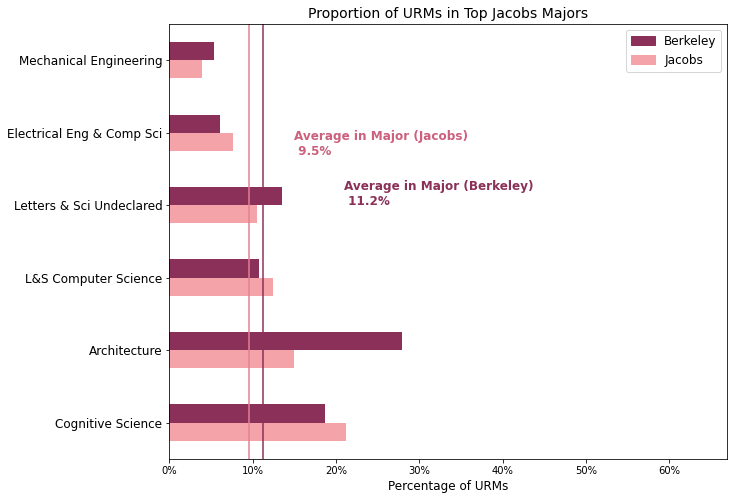

In [156]:
fig = both_urm_prop.plot(kind='barh', figsize=(10,8), xlabel="", color=jacobs_two)
fig.axvline(x = avg_urm_berkeley['URM Proportion'][0],color=jacobs_two[1])
fig.axvline(x = avg_urm_jacobs['URM Proportion'][0],color=mcolors.to_rgb('#E38191'))

fig.set_title('Proportion of URMs in Top Jacobs Majors',fontdict=title_font)
fig.text(21,3,"Average in Major (Berkeley) \n 11.2%",fontdict=berkeley_font)
fig.text(15,3.7,"Average in Major (Jacobs) \n 9.5%",fontdict=jacobs_font)

fig.set_xlabel("Percentage of URMs", fontsize=12)
fig.legend(handles=[BERK, JAC], loc=1, prop=legend_font)
fig.set_xlim((0.0, 66.96226415094338))
fig.set_xticklabels([str(int(x))+'%' for x in fig.get_xticks()])
fig.set_yticklabels(fig.get_yticklabels(), fontsize=12);

In [157]:
cleaned_jacobs = jacobs.loc[jacobs['ppsk'] != 'MISSING']
cleaned_jacobs['ppsk'] = cleaned_jacobs.loc[:, 'ppsk'].astype(int)
all_jacobs = cleaned_jacobs.merge(student_majors[['ppsk','major']], how='left')
all_jacobs = add_major(all_jacobs.drop_duplicates(subset='ppsk'))
all_jacobs.dropna(inplace=True)
all_jacobs['Top 6'] = all_jacobs['major'].apply(lambda x: True if pd.Series([x]).isin(top_majors).any() else False)
all_jacobs['Top 6'].sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


4366

In [ ]:
all_jacobs

In [158]:
prop_jacobs

,ppsk,DES INV Students,All Courses Students,Maker Pass Holders,ethnic.l1,ethnic.l2,ethnic.l3,gender,year.name,major
1,1482482,N,Y,Y,International,International,International,Male,2015 Fall,L&S Computer Science
3,1473315,N,Y,Y,Asian/Pacific Islander,Asian,Chinese,Female,2015 Fall,L&S Computer Science
8,1473351,N,Y,N,International,International,International,Male,2015 Fall,L&S Computer Science
12,1482526,N,N,Y,White/Other,Other/Decline to State,Decline to State,Male,2015 Fall,Mechanical Engineering
14,1474646,N,N,Y,Asian/Pacific Islander,Asian,Chinese,Male,2015 Fall,L&S Computer Science
...,...,...,...,...,...,...,...,...,...,...
5438,2741368,N,Y,N,Asian/Pacific Islander,Asian,Chinese,Female,2020 Spring,L&S Computer Science
5440,2740646,N,Y,N,Asian/Pacific Islander,Asian,Chinese,Male,2020 Spring,Cognitive Science
5442,2639777,N,Y,N,Asian/Pacific Islander,Asian,Chinese,Female,2020 Spring,Cognitive Science
5443,2635196,N,Y,N,Asian/Pacific Islander,Asian,Korean,Male,2020 Spring,Letters & Sci Undeclared


In [ ]:
prop_jacobs['major'].apply(lambda x: True if pd.Series([x]).isin(top_majors).any() else False)


In [159]:
all_jacobs

,ppsk,year,term,DES INV Students,All Courses Students,Maker Pass Holders,major,Top 6
2,781707,2015,Fall,N,N,Y,Engineering Science,False
3,895798,2015,Fall,N,N,Y,Molecular & Cell Biology,False
4,857674,2015,Fall,N,N,Y,Bioengineering,False
5,856881,2015,Fall,N,Y,Y,Chem & Biomolecular Eng,False
6,946962,2015,Fall,N,Y,Y,Electrical Eng & Computer Sci,False
...,...,...,...,...,...,...,...,...
8332,4243215,2020,Fall,N,Y,N,Mechanical Engineering,True
8334,4244554,2020,Fall,N,Y,N,Mechanical Engineering,True
8335,4245017,2020,Fall,N,Y,N,Mechanical Engineering,True
8336,4252132,2020,Fall,Y,Y,N,Molecular Environ Biology,False


In [160]:
4366/8315 * 100

52.50751653638004

In [161]:
berk_n = student_courses[['ppsk']].drop_duplicates().merge(majors[['ppsk','major',]], how='left').drop_duplicates()
berk_n = add_major(berk_n)
berk_n.dropna(inplace=True)
berk_n.drop_duplicates(subset='ppsk')

,ppsk,major
2,169335,Near Eastern Studies
3,194536,Education
4,198873,History
5,222677,Letters & Sci Undeclared
8,315061,Social Welfare
...,...,...
220968,4232959,History
220969,4234298,Applied Mathematics
221162,4240748,Sociology
221238,4243215,Mechanical Engineering


In [162]:
berk_n['Top 6'] = berk_n['major'].apply(lambda x: True if pd.Series([x]).isin(top_majors).any() else False)
berk_n['Top 6'].sum()

In [44]:
21877/120476 * 100

18.158803413127924

### Berkeley 6 majors: 18.2%
### Jacobs 6 majors: 52.5%